# Multiple Linear Regression

### Import the dataset

In [5]:
import pandas as pd

In [6]:
dataset = pd.read_csv(r"D:\Sushmitha\Susuhmi\Startups.csv")

### Exploratory Data Analysis (EDA)

### Explore the dataset

In [7]:
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [8]:
print(dataset.shape)

(50, 5)


In [9]:
print(dataset.columns)	

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [10]:
print(dataset.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [11]:
print(dataset.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [12]:
print(dataset.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


#### Data Visualization

In [13]:
import matplotlib.pyplot as plt

##### Relationship Between Profit and Each Feature

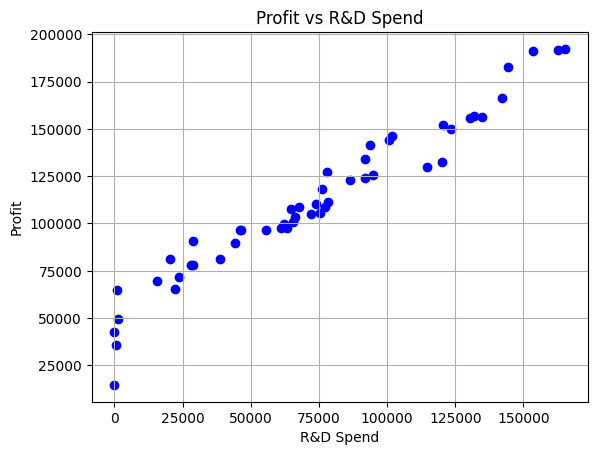

In [14]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], color='blue')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

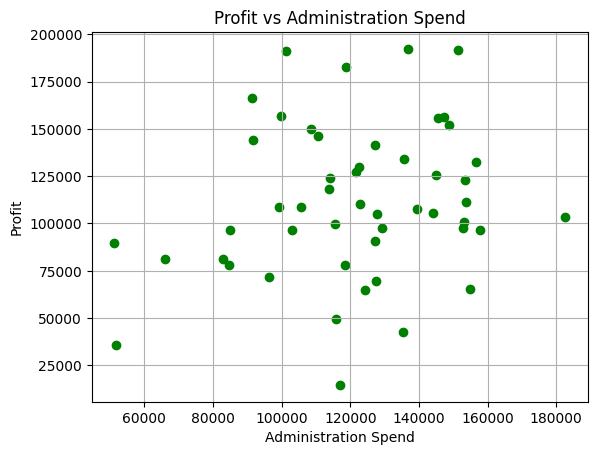

In [15]:
plt.scatter(dataset['Administration'], dataset['Profit'], color='green')
plt.title('Profit vs Administration Spend')
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

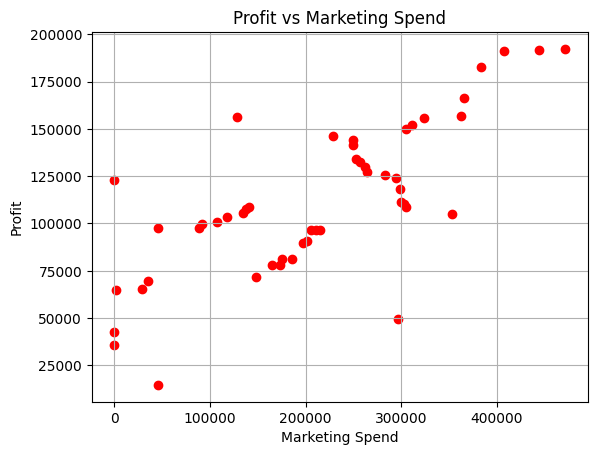

In [16]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], color='red')
plt.title('Profit vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

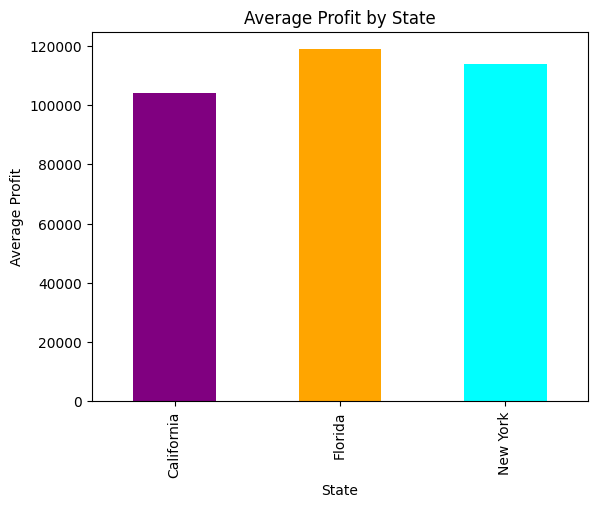

In [17]:
import seaborn as sns

state_profit = dataset.groupby('State')['Profit'].mean()
state_profit.plot(kind='bar', color=['purple', 'orange', 'cyan'])
plt.title('Average Profit by State')
plt.ylabel('Average Profit')
plt.show()

## Model Building

##### Selecting Feature and Target

In [40]:
X = dataset.drop(columns=['Profit']) 
y = dataset['Profit'] 

In [41]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [42]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Split the dataset into training and testing sets

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
dataset.shape

(50, 5)

In [46]:
X_train.shape

(40, 4)

In [47]:
X_test.shape

(10, 4)

## Encoding categorical data

In [48]:
print(dataset['State'].unique())

X_train_encoded = pd.get_dummies(X_train, dtype=int)
X_test_encoded = pd.get_dummies(X_test, dtype=int)

['New York' 'California' 'Florida']


In [50]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [51]:
X_train_encoded.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0


In [52]:
X_test_encoded.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
28,66051.52,182645.56,118148.20,0,1,0
11,100671.96,91790.61,249744.55,1,0,0
10,101913.08,110594.11,229160.95,0,1,0
41,27892.92,84710.77,164470.71,0,1,0
2,153441.51,101145.55,407934.54,0,1,0


### Feature Scaling (Scaling the feature columns)

In [53]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [54]:
print("Scaled X_train:\n", X_train_scaled[:5])
print("\nScaled X_test:\n", X_test_scaled[:5])

Scaled X_train:
 [[-0.35006454 -0.78547109  0.1011968  -0.81649658  1.73205081 -0.73379939]
 [-0.55530319 -1.48117426  0.02734979 -0.81649658 -0.57735027  1.36277029]
 [ 0.07935762  0.80133381 -0.55152132 -0.81649658  1.73205081 -0.73379939]
 [-0.54638238  1.32505817  0.07011684  1.22474487 -0.57735027 -0.73379939]
 [ 0.43485371 -0.35598663  0.75148516 -0.81649658  1.73205081 -0.73379939]]

Scaled X_test:
 [[-0.1214952   2.2889053  -0.68032287 -0.81649658  1.73205081 -0.73379939]
 [ 0.6280306  -1.22069499  0.38557774  1.22474487 -0.57735027 -0.73379939]
 [ 0.65490061 -0.49434195  0.21885524 -0.81649658  1.73205081 -0.73379939]
 [-0.94762148 -1.49417936 -0.30512104 -0.81649658  1.73205081 -0.73379939]
 [ 1.77048111 -0.85932667  1.6668808  -0.81649658  1.73205081 -0.73379939]]


### Training the Multiple Linear Regression model on the Training set

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

## Make Predictions with Test Data

In [32]:
y_pred = model.predict(X_test_scaled)


print("Actual Profit:\n", y_test[:5])
print("\nPredicted Profit:\n", y_pred[:5])

# y_test: Actual Value

Actual Profit:
 28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64

Predicted Profit:
 [103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055]


In [33]:
import numpy as np

y_pred = np.round(y_pred, 2)  

print("Actual Profit:\n", y_test[:5])
print("\nPredicted Profit:\n", y_pred[:5])

Actual Profit:
 28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64

Predicted Profit:
 [103015.2  132582.28 132447.74  71976.1  178537.48]


### Evaluating the Model

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

mse = mean_squared_error(y_test, y_pred) # Calculating Mean Squared Error
rmse = np.sqrt(mse) # Taking square root to get Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # Calculating R square score
mae = mean_absolute_error(y_test,y_pred)

# Printing the evaluation results
print("\nModel Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Model Evaluation:
Root Mean Squared Error (RMSE): 9137.99
Mean Absolute Error (MAE): 7514.29
R-squared (R2 Score): 0.93


#### Making prediction for new data

In [35]:
new_data = pd.DataFrame({
    'R&D Spend': [160000, 161000],               
    'Administration': [130000, 132000], 
    'Marketing Spend': [300000, 700000], 
    'State': ['Florida', 'New York'] 
})

new_data

,R&D Spend,Administration,Marketing Spend,State
0,160000,130000,300000,Florida
1,161000,132000,700000,New York


### Ensuring New Data Matches Training Data Structure

In [36]:
new_data_encoded = pd.get_dummies(new_data, dtype=int)

# Ensure new data has the same columns as X_train, adding missing ones with 0
new_data_encoded = new_data_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
new_data_encoded

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,160000,130000,300000,0,1,0
1,161000,132000,700000,0,0,1


In [37]:
# Apply the same feature scaling
new_data_scaled = scaler.transform(new_data_encoded)
new_data_scaled

array([[ 1.91247115,  0.25528058,  0.79263549, -0.81649658,  1.73205081,
        -0.73379939],
       [ 1.93412095,  0.33253779,  4.03254481, -0.81649658, -0.57735027,
         1.36277029]])

### Make predictions

In [38]:
new_predictions = model.predict(new_data_scaled)
new_predictions = np.round(new_predictions, 2)  
new_predictions

array([180607.64, 197749.54])

### Display predictions

In [39]:
print("Predicted Profit for New Data:")
for i, prediction in enumerate(new_predictions):
    print(f"Predicted Profit {i+1}: {prediction:.2f}/-")

Predicted Profit for New Data:
Predicted Profit 1: 180607.64/-
Predicted Profit 2: 197749.54/-
